<a href="https://colab.research.google.com/github/shraddha0822/CodeClauseInternship_SentimentAnalysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline
import nltk

# Download NLTK resources (for VADER)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
# Function to analyze sentiment using TextBlob
def analyze_sentiment_textblob(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    # Categorizing the sentiment
    if polarity > 0:
        sentiment = "Positive"
    elif polarity < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return sentiment, polarity

# Example usage
text_input = "I absolutely love this product! It's fantastic."
sentiment, polarity = analyze_sentiment_textblob(text_input)
print(f"Text: {text_input}")
print(f"Sentiment: {sentiment}, Polarity: {polarity}")

Text: I absolutely love this product! It's fantastic.
Sentiment: Positive, Polarity: 0.5125


In [3]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to analyze sentiment using VADER
def analyze_sentiment_vader(text):
    scores = analyzer.polarity_scores(text)
    # Categorizing based on compound score
    compound = scores['compound']
    if compound > 0.05:
        sentiment = "Positive"
    elif compound < -0.05:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return sentiment, scores

# Example usage
text_input = "The service was absolutely terrible."
sentiment, scores = analyze_sentiment_vader(text_input)
print(f"Text: {text_input}")
print(f"Sentiment: {sentiment}, Scores: {scores}")

Text: The service was absolutely terrible.
Sentiment: Negative, Scores: {'neg': 0.459, 'neu': 0.541, 'pos': 0.0, 'compound': -0.5256}


In [4]:
# Initialize Hugging Face sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Function to analyze sentiment using Hugging Face Transformers
def analyze_sentiment_transformers(text):
    result = sentiment_pipeline(text)
    label = result[0]['label']
    score = result[0]['score']
    return label, score

# Example usage
text_input = "I feel absolutely amazing after using this!"
label, score = analyze_sentiment_transformers(text_input)
print(f"Text: {text_input}")
print(f"Sentiment: {label}, Confidence Score: {score}")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Text: I feel absolutely amazing after using this!
Sentiment: POSITIVE, Confidence Score: 0.9998849630355835


In [5]:
# Combine TextBlob, VADER, and Transformers for comparison
def compare_sentiments(text):
    textblob_sentiment, textblob_score = analyze_sentiment_textblob(text)
    vader_sentiment, vader_scores = analyze_sentiment_vader(text)
    transformers_label, transformers_score = analyze_sentiment_transformers(text)

    print(f"Text: {text}")
    print("\nTextBlob Analysis:")
    print(f"Sentiment: {textblob_sentiment}, Polarity: {textblob_score}")
    print("\nVADER Analysis:")
    print(f"Sentiment: {vader_sentiment}, Scores: {vader_scores}")
    print("\nTransformers Analysis:")
    print(f"Sentiment: {transformers_label}, Confidence Score: {transformers_score}")

# Example usage
text_input = "The movie was okay, not great but not bad either."
compare_sentiments(text_input)

Text: The movie was okay, not great but not bad either.

TextBlob Analysis:
Sentiment: Positive, Polarity: 0.14999999999999997

VADER Analysis:
Sentiment: Positive, Scores: {'neg': 0.149, 'neu': 0.487, 'pos': 0.364, 'compound': 0.4728}

Transformers Analysis:
Sentiment: POSITIVE, Confidence Score: 0.9919201135635376


In [6]:
# User input for real-time sentiment analysis
user_text = input("Enter a sentence for sentiment analysis: ")
compare_sentiments(user_text)

Enter a sentence for sentiment analysis: The movie was shit
Text: The movie was shit

TextBlob Analysis:
Sentiment: Negative, Polarity: -0.2

VADER Analysis:
Sentiment: Negative, Scores: {'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'compound': -0.5574}

Transformers Analysis:
Sentiment: NEGATIVE, Confidence Score: 0.9997188448905945


<ipython-input-7-30f951f0e009>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=methods, y=scores, palette='viridis')


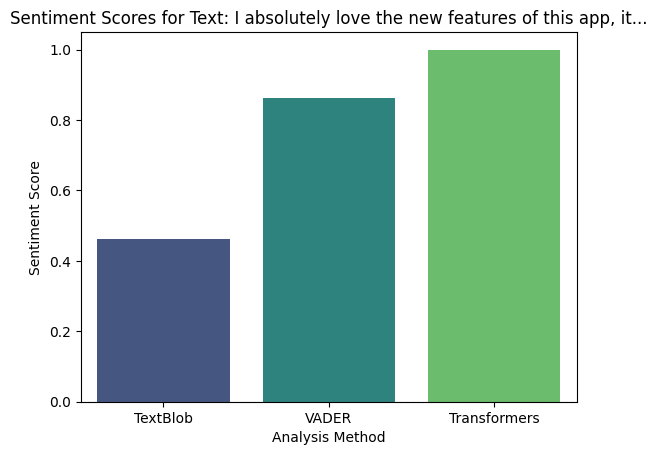

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize sentiment scores
def visualize_sentiment(text):
    # Analyze sentiment using the three methods
    textblob_sentiment, textblob_score = analyze_sentiment_textblob(text)
    vader_sentiment, vader_scores = analyze_sentiment_vader(text)
    transformers_label, transformers_score = analyze_sentiment_transformers(text)

    # Prepare data for visualization
    methods = ['TextBlob', 'VADER', 'Transformers']
    scores = [textblob_score, vader_scores['compound'], transformers_score]

    # Create a bar plot
    sns.barplot(x=methods, y=scores, palette='viridis')
    plt.title(f"Sentiment Scores for Text: {text[:50]}...")
    plt.ylabel("Sentiment Score")
    plt.xlabel("Analysis Method")
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Add a zero line for reference
    plt.show()

# Example usage
text_input = "I absolutely love the new features of this app, it's amazing!"
visualize_sentiment(text_input)

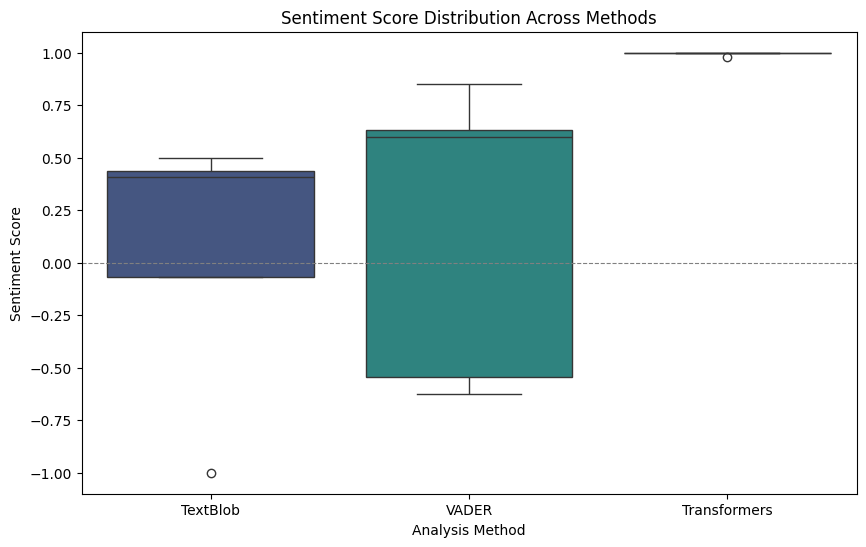

In [8]:
# Batch visualization function
def visualize_batch_sentiments(texts):
    # Initialize lists to store sentiment scores
    textblob_scores = []
    vader_scores = []
    transformers_scores = []

    for text in texts:
        textblob_scores.append(analyze_sentiment_textblob(text)[1])  # TextBlob polarity
        vader_scores.append(analyze_sentiment_vader(text)[1]['compound'])  # VADER compound score
        transformers_scores.append(analyze_sentiment_transformers(text)[1])  # Transformers confidence

    # Create a dataframe for visualization
    import pandas as pd
    data = pd.DataFrame({
        'TextBlob': textblob_scores,
        'VADER': vader_scores,
        'Transformers': transformers_scores
    })

    # Plot sentiment distribution
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, palette='viridis')
    plt.title("Sentiment Score Distribution Across Methods")
    plt.ylabel("Sentiment Score")
    plt.xlabel("Analysis Method")
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)  # Add a zero line for reference
    plt.show()

# Example batch of texts
texts = [
    "I love this product, it's so useful!",
    "This is the worst experience I've ever had.",
    "The movie was average, not bad but not great.",
    "Fantastic service and quick response!",
    "Meh, it was okay but could have been better."
]

visualize_batch_sentiments(texts)